# IEE352 - Upsampling

Es el proceso mediante el cual se incrementa el número de muestras de una señal discreta intercalando $L − 1$ ceros entre las muestras de la señal original. También se le conoce como expansor.
$$
\overset{x[n]}{\longrightarrow}
{\boxed{\:\uparrow L\:}}
\overset{x_L[n]}{\longrightarrow}
$$

$$x_L[n] =
\begin{cases}
x[n/L] & n = 0, \pm L, \pm 2L, \ldots \\
0 & \text{otro caso}
\end{cases}
= \sum_{k=-\infty}^{\infty} x[k] \delta[n-kL].
$$

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
fs = 1000
B = 500
Ns = 1000
n = np.arange(Ns)
t = n/fs
chirp = (1-t)*np.sin(2*np.pi*(B/2)*t**2)

Text(0, 0.5, 'Chirp signal')

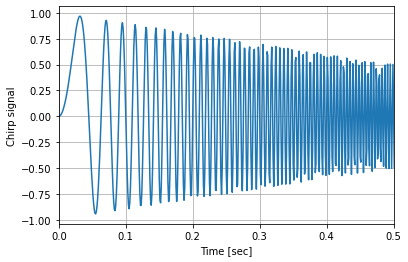

In [4]:
plt.figure(1)
plt.plot(t,chirp)
plt.xlim([0,0.5])
plt.grid('on')
plt.xlabel('Time [sec]')
plt.ylabel('Chirp signal')

In [5]:
fft_chirp = np.fft.fftshift(np.fft.fft(chirp))
spc = np.abs(fft_chirp)**2
freq = (np.arange(Ns) - Ns/2) * fs / Ns

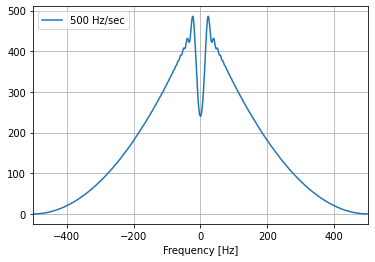

In [6]:
plt.figure(2)
plt.plot(freq,spc,label=str(B)+' Hz/sec')
plt.xlim([-fs/2,fs/2])
plt.grid('on')
plt.xlabel('Frequency [Hz]')
plt.legend(loc='upper left')


In [7]:
U = 4
Ns_up = U*Ns
fs_up = U*fs
chirp_up = np.zeros([Ns_up])
chirp_up[U*n] = chirp[:]
t_up = np.arange(Ns_up)/fs_up

Text(0, 0.5, 'Chirp signal Upsampled')

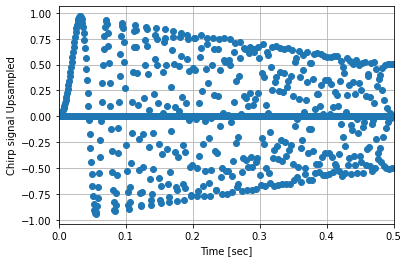

In [8]:
plt.figure(3)
plt.plot(t_up,chirp_up,'o')
plt.xlim([0,0.5])
#plt.xlim([0.5,0.51])
plt.grid('on')
plt.xlabel('Time [sec]')
plt.ylabel('Chirp signal Upsampled')

In [9]:
fft_chirp_up = np.fft.fftshift(np.fft.fft(chirp_up))
spc_up = np.abs(fft_chirp_up)**2
freq_up = (np.arange(Ns_up) - Ns_up/2) * fs_up / Ns_up

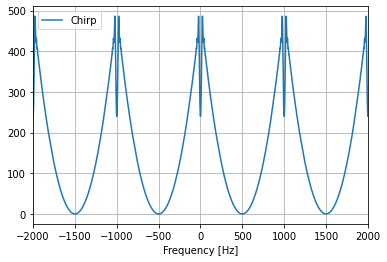

In [10]:
plt.figure(3)
plt.plot(freq_up,spc_up,label='Chirp')
plt.xlim([-fs_up/2,fs_up/2])
plt.grid('on')
plt.xlabel('Frequency [Hz]')
plt.legend(loc='upper left')
plt.show()